<a href="https://colab.research.google.com/github/kithmiGunawardna/Hate_Speech_detection/blob/master/Hate_Speech_Detection_imbalanced_dataset_classical_ML_approches_BOW(uni_gram)_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import relevant libraraies
import pandas as pd
import numpy as np
from google.colab import drive
import re
import nltk
nltk.download('stopwords')
nltk.download('snowball_data')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score, recall_score, precision_score




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package snowball_data to /root/nltk_data...


 0 - hate speech 1 - offensive language 2 - neither

In [ ]:
#import dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Campus_Research/labeled_data.csv')

Mounted at /content/drive


In [ ]:
#df['tweet'] = df['tweet'].str.lower()  #convert tweets to lowerclass letters

In [ ]:
# # removing the users from the tweets
# import re
# import re

# # Assuming df['tweet'] is a Pandas Series
# df['tweet'] = df['tweet'].apply(lambda x: re.sub('@[^\s]+', '', str(x)))




In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
# import nltk

# from nltk.stem import PorterStemmer

# nltk.download('stopwords')

# from nltk.corpus import stopwords

In [ ]:
# stop_words = set(stopwords.words('english')) #to avoid similer ones we put thrm in to a set
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     words = [stemmer.stem(word) for word in text.split() if not word.lower() in stop_words]
#     return ' '.join(words)

# df['processed_text'] = df['tweet'].apply(preprocess_text)

In [ ]:
# pattern = r'[^\w\s]'
# df['processed_text'] =df['processed_text'].replace(pattern, '', regex=True)

**cleaning the dataset**

In [ ]:
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))


def clean_text(text):
  """
  This function cleans text data by removing usernames, special characters, URLs, hashtags,
  lowercaseing text, removing stopwords, and applying stemming.

  Args:
      text: The text data to be cleaned.

  Returns:
      The cleaned text data.
  """

  # Remove usernames using regular expressions
  text = re.sub(r"@\w+", "", text)  # Username pattern

  # Lowercase text
  text = str(text).lower()

  # Remove special characters, URLs, hashtags
  text = re.sub(r"\[.*?\]|https?://\S+|www\.\S+|\s+#\S+", "", text)

  # Remove punctuation
  text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)

  # Remove newline characters
  text = re.sub("\n", "", text)

  # Remove words containing numbers (e.g., "RT123")
  text = re.sub(r"\w*\d\w*", "", text)

  # Split text into words after removing stopwords
  words = [word for word in text.split() if word not in stopword]

  # Apply stemming to each word
  stemmed_words = [stemmer.stem(word) for word in words]

  # Join stemmed words back into text
  cleaned_text = " ".join(stemmed_words)

  return cleaned_text

In [ ]:
# Apply clean_text function
df.loc[:, 'tweet'] = df['tweet'].apply(clean_text)

In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt woman shouldnt complain clean hous amp man ...
1,1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,2,3,0,3,0,1,rt dawg rt ever fuck bitch start cri confus shit
3,3,3,0,2,1,1,rt look like tranni
4,4,6,0,6,0,1,rt shit hear might true might faker bitch told ya
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthafin lie right tl trash mine bibl scr...
24779,25292,3,0,1,2,2,youv gone broke wrong heart babi drove redneck...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitch tellin lie


In [ ]:
df1 =df[['class', 'tweet']]
df1


,class,tweet
0,2,rt woman shouldnt complain clean hous amp man ...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,1,rt dawg rt ever fuck bitch start cri confus shit
3,1,rt look like tranni
4,1,rt shit hear might true might faker bitch told ya
...,...,...
24778,1,yous muthafin lie right tl trash mine bibl scr...
24779,2,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


**visualization the data set**

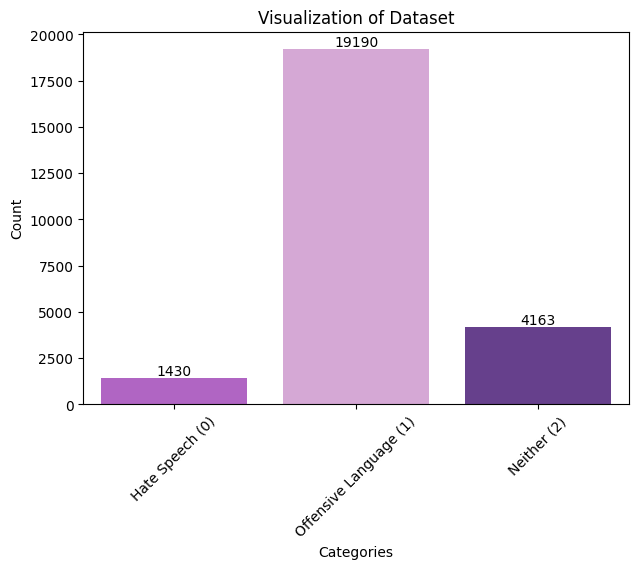

In [ ]:
# Data
category = ['Hate Speech (0)', 'Offensive Language (1)', 'Neither (2)']
count = df['class'].value_counts()
value_count = [count[0], count[1], count[2]]

# Define a purple color palette for the bar plot
bar_colors = ['mediumorchid', 'plum', 'rebeccapurple']  # Purple shades

# Create a bar chart with Seaborn
# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Visualization of Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
for bar in sns.barplot(x=category, y=value_count, palette=bar_colors).patches:
  plt.annotate(int(bar.get_height()),
              (bar.get_x() + bar.get_width() / 2, bar.get_height()),
              ha='center', va='bottom')



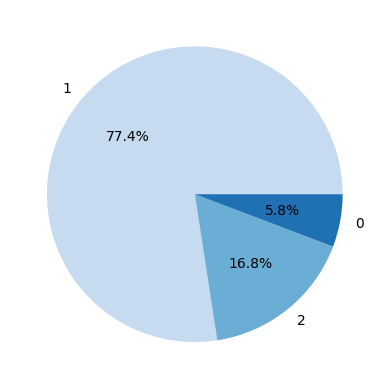

In [ ]:
blue_palette = sns.color_palette("Blues", n_colors=3)  # Customize 'n_colors' based on the number of slices

# Create a pie chart with the blue color palette
plt.pie(
    df['class'].value_counts().values,  # Values for the pie chart
    labels=df['class'].value_counts().index,  # Labels for each slice
    autopct='%1.1f%%',  # Display the percentage with one decimal place
    colors=blue_palette  # Set the color palette to shades of blue
)

# Display the pie chart
plt.show()

**spliting the dataset**

In [ ]:
y = df['class']
x = df.tweet

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


***using bag of word uni gram method traing the models:***
     



In [ ]:
vectorizer = CountVectorizer()
x_train_vectorizer  = vectorizer.fit_transform(x_train)
vectorizer.get_feature_names_out()
x_test_vectorizer = vectorizer.transform(x_test)

***SVM model***

In [ ]:
parameters_SVM = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10] ,'gamma':('scale','float','auto')}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters_SVM)
clf.fit(x_train_vectorizer,y_train)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': ('scale', 'float', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [ ]:
print(clf.cv_results_)



{'mean_fit_time': array([1.07729508e+01, 1.95629087e+01, 5.46389866e+01, 7.44063082e+00,
       2.38385201e-03, 2.22601891e-03, 2.26235390e-03, 2.25453377e-03,
       1.10380370e+01, 1.22058346e+01, 9.00705132e+00, 1.13130047e+01,
       1.46668006e+01, 3.99605806e+01, 5.63186691e+01, 6.13270049e+00,
       1.89819336e-03, 2.08482742e-03, 1.76301003e-03, 1.69434547e-03,
       1.45980965e+01, 1.36805978e+01, 9.05095034e+00, 1.26291264e+01]), 'std_fit_time': array([4.33006129e-01, 1.05824386e+00, 3.00757980e+00, 3.90617982e-01,
       1.72590984e-04, 3.15616494e-05, 1.01358690e-04, 3.83717353e-05,
       4.17791772e-01, 1.36446296e-01, 2.47310924e-01, 4.88265911e-01,
       7.83169461e-01, 1.22739070e+00, 6.48612593e+00, 5.95297436e-01,
       1.58294467e-04, 5.53924050e-04, 3.04693347e-05, 2.65930677e-05,
       7.18122895e-01, 2.42943063e-01, 2.35216852e-01, 9.05951386e-02]), 'mean_score_time': array([1.63432326, 3.51213541, 3.86031842, 1.45797553, 0.        ,
       0.        , 0.   

In [ ]:
df_svc = pd.DataFrame(clf.cv_results_)


In [ ]:
df_svc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.772951,0.433006,1.634323,0.100295,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.885779,0.892812,0.886255,0.883985,0.884489,0.886664,0.003183,4
1,19.562909,1.058244,3.512135,0.300033,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.891326,0.895082,0.893821,0.895839,0.896595,0.894533,0.001847,1
2,54.638987,3.007580,3.860318,0.298986,1,scale,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.803580,0.800504,0.797982,0.791929,0.800504,0.798900,0.003911,10
3,7.440631,0.390618,1.457976,0.127160,1,scale,sigmoid,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.887796,0.890290,0.887516,0.892055,0.893569,0.890245,0.002357,3
4,0.002384,0.000173,0.000000,0.000000,1,float,linear,"{'C': 1, 'gamma': 'float', 'kernel': 'linear'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,0.002226,0.000032,0.000000,0.000000,1,float,rbf,"{'C': 1, 'gamma': 'float', 'kernel': 'rbf'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,0.002262,0.000101,0.000000,0.000000,1,float,poly,"{'C': 1, 'gamma': 'float', 'kernel': 'poly'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
7,0.002255,0.000038,0.000000,0.000000,1,float,sigmoid,"{'C': 1, 'gamma': 'float', 'kernel': 'sigmoid'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
8,11.038037,0.417792,1.546287,0.035890,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.885779,0.892812,0.886255,0.883985,0.884489,0.886664,0.003183,4
9,12.205835,0.136446,2.631700,0.008470,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.774584,0.774527,0.774527,0.774779,0.774779,0.774639,0.000116,12


In [ ]:
df_svc[['param_C', 'param_kernel', 'params', 'mean_test_score', 'rank_test_score']]


,param_C,param_kernel,params,mean_test_score,rank_test_score
0,1,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.886664,4
1,1,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.894533,1
2,1,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.798900,10
3,1,sigmoid,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.890245,3
4,1,linear,"{'C': 1, 'gamma': 'float', 'kernel': 'linear'}",NaN,17
5,1,rbf,"{'C': 1, 'gamma': 'float', 'kernel': 'rbf'}",NaN,17
6,1,poly,"{'C': 1, 'gamma': 'float', 'kernel': 'poly'}",NaN,17
7,1,sigmoid,"{'C': 1, 'gamma': 'float', 'kernel': 'sigmoid'}",NaN,17
8,1,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.886664,4
9,1,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.774639,12


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=1)


In [ ]:
SVM_output = clf.predict(x_test_vectorizer)

<Axes: >

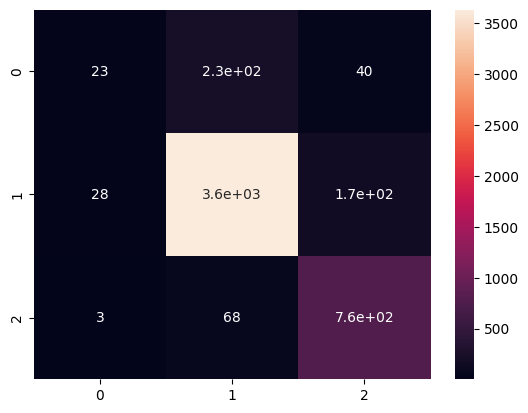

In [ ]:
y_true = y_test
y_pred = SVM_output
cm_for_SVM = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_SVM, annot=True)


In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.43      0.08      0.13       290
           1       0.92      0.95      0.94      3832
           2       0.78      0.91      0.84       835

    accuracy                           0.89      4957
   macro avg       0.71      0.65      0.64      4957
weighted avg       0.87      0.89      0.87      4957



In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)






0.8736788910915727
0.891466612870688
0.8717534917609172


***Logistic Regression model***  

In [ ]:
parameters_Logistic_regression = {'solver':('lbfgs', 'liblinear','newton-cg') ,'C':[1.0,10.0],'penalty':('l1','l2','elasticnet')}
Logistic_Regression = LogisticRegression()
model = GridSearchCV(Logistic_Regression,parameters_Logistic_regression)
model.fit(x_train_vectorizer,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 10.0],
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg')})

In [ ]:
print(model.cv_results_)

{'mean_fit_time': array([2.78477669e-03, 1.43995857e-01, 1.84960365e-03, 2.40993686e+00,
       3.36572886e-01, 1.64673619e+00, 7.42096901e-03, 7.90452957e-03,
       3.83615494e-03, 3.84187698e-03, 5.28720284e-01, 2.68397331e-03,
       3.89062409e+00, 1.23804426e+00, 1.96274438e+00, 2.52161026e-03,
       2.41422653e-03, 2.41632462e-03]), 'std_fit_time': array([1.71744864e-03, 8.05761816e-03, 1.53817305e-04, 5.28259772e-01,
       1.83549712e-02, 5.46420304e-01, 2.40149699e-03, 3.52520711e-03,
       9.75589890e-04, 1.46495645e-03, 2.70247181e-02, 1.81026289e-04,
       9.13731205e-01, 2.49566181e-01, 1.60081760e-01, 1.20877288e-04,
       3.82371671e-05, 3.81011688e-05]), 'mean_score_time': array([0.        , 0.00176468, 0.        , 0.00399928, 0.00244079,
       0.0034657 , 0.        , 0.        , 0.        , 0.        ,
       0.0027307 , 0.        , 0.00668945, 0.0037149 , 0.00248752,
       0.        , 0.        , 0.        ]), 'std_score_time': array([0.00000000e+00, 1.85757275

In [ ]:
df_logistic_regression = pd.DataFrame(model.cv_results_)

In [ ]:
df_logistic_regression

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002785,0.001717,0.000000,0.000000,1.0,l1,lbfgs,"{'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.143996,0.008058,0.001765,0.000186,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.892083,0.900126,0.887768,0.891803,0.893569,0.893070,0.004018,3
2,0.001850,0.000154,0.000000,0.000000,1.0,l1,newton-cg,"{'C': 1.0, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,2.409937,0.528260,0.003999,0.002282,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.891578,0.901135,0.891299,0.889786,0.895082,0.893776,0.004068,1
4,0.336573,0.018355,0.002441,0.000173,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.892839,0.896847,0.888525,0.889281,0.894830,0.892464,0.003181,4
5,1.646736,0.546420,0.003466,0.002014,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.891578,0.901387,0.891047,0.889786,0.894830,0.893726,0.004177,2
6,0.007421,0.002401,0.000000,0.000000,1.0,elasticnet,lbfgs,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.007905,0.003525,0.000000,0.000000,1.0,elasticnet,liblinear,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.003836,0.000976,0.000000,0.000000,1.0,elasticnet,newton-cg,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.003842,0.001465,0.000000,0.000000,10.0,l1,lbfgs,"{'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
df_logistic_regression[['param_C'	,'param_penalty'	,'param_solver', 'params', 'mean_test_score', 'rank_test_score']]

,param_C,param_penalty,param_solver,params,mean_test_score,rank_test_score
0,1.0,l1,lbfgs,"{'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,9
1,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.893070,3
2,1.0,l1,newton-cg,"{'C': 1.0, 'penalty': 'l1', 'solver': 'newton-...",NaN,9
3,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.893776,1
4,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.892464,4
5,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.893726,2
6,1.0,elasticnet,lbfgs,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
7,1.0,elasticnet,liblinear,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
8,1.0,elasticnet,newton-cg,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
9,10.0,l1,lbfgs,"{'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,9


In [ ]:
print(model.best_params_)
print(model.best_estimator_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression()


In [ ]:
logisticregresision_output = model.predict(x_test_vectorizer)


<Axes: >

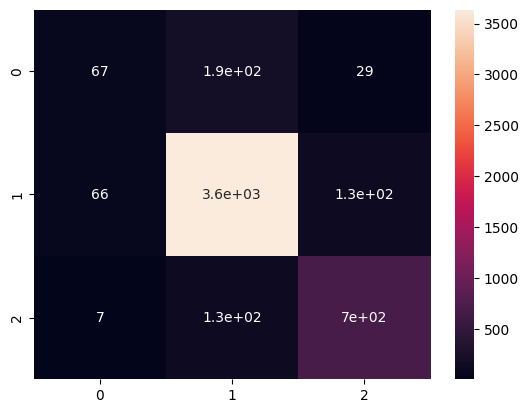

In [ ]:
y_true = y_test
y_pred = logisticregresision_output
cm_for_LogisticRegression = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_LogisticRegression, annot=True)


In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)


0.8786700605473025
0.8878353843050232
0.8749929638568666


In [ ]:
print(classification_report(y_true, logisticregresision_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.47      0.23      0.31       290
           1       0.92      0.96      0.94      3832
           2       0.84      0.84      0.84       835

    accuracy                           0.89      4957
   macro avg       0.74      0.67      0.69      4957
weighted avg       0.88      0.89      0.88      4957



***Decision Tree Classifier***

In [ ]:
parameters_decision_tree_classifier = {'criterion':('gini', 'entropy','log_loss'), 'splitter':('best','random') ,'max_features':('sqrt','log2'),'max_depth' : [3,2,100,1000,10000],'min_samples_split':[2,20,30,40],'random_state':[0,42,123]}
Dession_tree_classifiar= DecisionTreeClassifier()
clf = GridSearchCV(Dession_tree_classifiar,parameters_decision_tree_classifier )
clf.fit(x_train_vectorizer,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [3, 2, 100, 1000, 10000],
                         'max_features': ('sqrt', 'log2'),
                         'min_samples_split': [2, 20, 30, 40],
                         'random_state': [0, 42, 123],
                         'splitter': ('best', 'random')})

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([0.05259571, 0.04675717, 0.02889013, 0.05268817, 0.06520972,
       0.06935682, 0.02165799, 0.04876103, 0.02262764, 0.02288222,
       0.02141008, 0.02090998, 0.02176232, 0.02093272, 0.02104154,
       0.02110152, 0.02088556, 0.02323174, 0.02115784, 0.02103281,
       0.02104378, 0.02180247, 0.02099056, 0.02234311, 0.01202898,
       0.01282911, 0.01129603, 0.01190782, 0.01155643, 0.01199255,
       0.01210294, 0.01070509, 0.00769815, 0.00785494, 0.0076376 ,
       0.00818028, 0.00796633, 0.0076087 , 0.00714178, 0.0073833 ,
       0.00712929, 0.00770526, 0.00758381, 0.00757575, 0.00776892,
       0.00879831, 0.0076057 , 0.00741887, 0.00999131, 0.01025286,
       0.01043196, 0.01065354, 0.0101995 , 0.01079412, 0.01185465,
       0.01011944, 0.01055055, 0.0104712 , 0.01068468, 0.01065979,
       0.01151352, 0.01215234, 0.01016631, 0.01091337, 0.01035333,
       0.01031766, 0.01139078, 0.01011887, 0.01076865, 0.01160598,
       0.01045022, 0.01097074, 0.00770345, 0

In [ ]:
df_dicision_tree = pd.DataFrame(clf.cv_results_)


In [ ]:
df_dicision_tree

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_random_state,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052596,0.015359,0.006576,0.003493,gini,3,sqrt,2,0,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.775845,0.774779,0.775536,0.774779,0.775788,0.775345,0.000474,485
1,0.046757,0.019213,0.012710,0.011485,gini,3,sqrt,2,0,random,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.775593,0.774023,0.775032,0.774275,0.775284,0.774841,0.000598,581
2,0.028890,0.011318,0.003724,0.000109,gini,3,sqrt,2,42,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.774584,0.776293,0.774779,0.775536,0.775284,0.775295,0.000604,489
3,0.052688,0.017743,0.009116,0.004667,gini,3,sqrt,2,42,random,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.777610,0.778815,0.774023,0.774779,0.774275,0.775900,0.001941,460
4,0.065210,0.026321,0.009365,0.003143,gini,3,sqrt,2,123,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.777862,0.775536,0.775032,0.780832,0.778310,0.777514,0.002090,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.839659,0.105490,0.016078,0.001737,log_loss,10000,log2,40,0,random,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.796268,0.808323,0.795460,0.805296,0.795965,0.800262,0.005437,260
716,0.532793,0.110297,0.010410,0.001472,log_loss,10000,log2,40,42,best,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.822491,0.804540,0.814628,0.813619,0.830265,0.817109,0.008699,168
717,0.668509,0.065084,0.013503,0.000869,log_loss,10000,log2,40,42,random,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.788452,0.794956,0.791929,0.812358,0.786885,0.794916,0.009159,300
718,0.470292,0.046985,0.010252,0.000758,log_loss,10000,log2,40,123,best,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.800050,0.801009,0.813115,0.804540,0.806053,0.804953,0.004639,229


In [ ]:
df_dicision_tree[['param_criterion', 'param_max_depth','param_max_features','param_min_samples_split','param_splitter', 'params', 'mean_test_score', 'rank_test_score']]

,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_splitter,params,mean_test_score,rank_test_score
0,gini,3,sqrt,2,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.775345,485
1,gini,3,sqrt,2,random,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.774841,581
2,gini,3,sqrt,2,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.775295,489
3,gini,3,sqrt,2,random,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.775900,460
4,gini,3,sqrt,2,best,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.777514,417
...,...,...,...,...,...,...,...,...
715,log_loss,10000,log2,40,random,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.800262,260
716,log_loss,10000,log2,40,best,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.817109,168
717,log_loss,10000,log2,40,random,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.794916,300
718,log_loss,10000,log2,40,best,"{'criterion': 'log_loss', 'max_depth': 10000, ...",0.804953,229


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

{'criterion': 'gini', 'max_depth': 1000, 'max_features': 'sqrt', 'min_samples_split': 20, 'random_state': 123, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=1000, max_features='sqrt',
                       min_samples_split=20, random_state=123)


In [ ]:
decision_tree_output = clf.predict(x_test_vectorizer)

<Axes: >

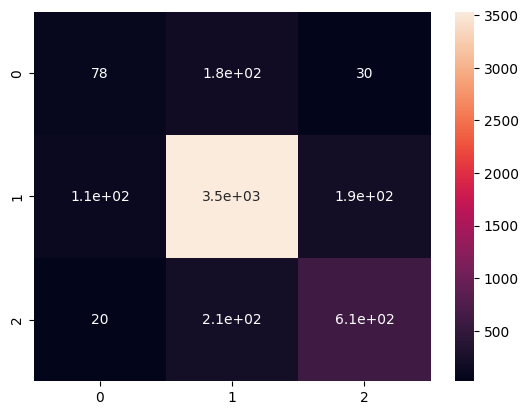

In [ ]:
y_true = y_test
y_pred =decision_tree_output
cm_for_decision_tree = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_decision_tree, annot=True)

In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.38      0.27      0.32       290
           1       0.90      0.92      0.91      3832
           2       0.73      0.73      0.73       835

    accuracy                           0.85      4957
   macro avg       0.67      0.64      0.65      4957
weighted avg       0.84      0.85      0.85      4957



In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

0.8456980290566822
0.8509178938874319
0.8417957143960996


***passive Aggressive***

In [ ]:
parameters_passive_aggrasive ={'C':[1.0,10.0],'max_iter':[10,100,1000],'early_stopping':(True,False),'shuffle':(True,False),'loss':('str','hinge'),'n_jobs':[1,10,100,1000],'random_state':[0,42,123]}
passive_aggrasive = PassiveAggressiveClassifier()
clf = GridSearchCV(passive_aggrasive,parameters_passive_aggrasive )
clf.fit(x_train_vectorizer,y_train)

GridSearchCV(estimator=PassiveAggressiveClassifier(),
             param_grid={'C': [1.0, 10.0], 'early_stopping': (True, False),
                         'loss': ('str', 'hinge'), 'max_iter': [10, 100, 1000],
                         'n_jobs': [1, 10, 100, 1000],
                         'random_state': [0, 42, 123],
                         'shuffle': (True, False)})

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([3.98426056e-03, 2.45165825e-03, 2.36659050e-03, 2.45313644e-03,
       2.65550613e-03, 2.73361206e-03, 2.37855911e-03, 2.36406326e-03,
       2.96635628e-03, 2.66146660e-03, 2.66757011e-03, 3.03611755e-03,
       2.48775482e-03, 2.36396790e-03, 2.30226517e-03, 2.83212662e-03,
       2.98051834e-03, 2.74000168e-03, 2.49104500e-03, 2.44946480e-03,
       2.43453979e-03, 2.42228508e-03, 2.91957855e-03, 2.47898102e-03,
       2.66432762e-03, 2.51946449e-03, 3.03902626e-03, 3.29341888e-03,
       2.55775452e-03, 2.57358551e-03, 2.48999596e-03, 2.69393921e-03,
       2.36935616e-03, 2.65994072e-03, 2.48947144e-03, 2.56280899e-03,
       2.53467560e-03, 2.61774063e-03, 2.60920525e-03, 2.43964195e-03,
       2.87604332e-03, 2.46095657e-03, 2.44441032e-03, 2.60500908e-03,
       2.45246887e-03, 2.46767998e-03, 2.48522758e-03, 2.50377655e-03,
       2.44464874e-03, 2.41060257e-03, 2.49404907e-03, 2.48942375e-03,
       2.47535706e-03, 2.46577263e-03, 2.41250992e-03, 2.47

In [ ]:
df_passive_aggrasive = pd.DataFrame(clf.cv_results_)


In [ ]:
df_passive_aggrasive

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_early_stopping,param_loss,param_max_iter,param_n_jobs,param_random_state,param_shuffle,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003984,0.001842,0.000000,0.000000,1.0,True,str,10,1,0,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
1,0.002452,0.000041,0.000000,0.000000,1.0,True,str,10,1,0,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
2,0.002367,0.000044,0.000000,0.000000,1.0,True,str,10,1,42,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
3,0.002453,0.000118,0.000000,0.000000,1.0,True,str,10,1,42,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
4,0.002656,0.000216,0.000000,0.000000,1.0,True,str,10,1,123,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.500381,0.048824,0.013956,0.003495,10.0,False,hinge,1000,1000,0,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.846949,0.844136,0.848172,0.840101,0.861791,0.848230,0.007326,265
572,0.925941,0.214314,0.019957,0.011318,10.0,False,hinge,1000,1000,42,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.844428,0.859269,0.847919,0.852963,0.846154,0.850147,0.005381,225
573,0.490226,0.048519,0.013080,0.012941,10.0,False,hinge,1000,1000,42,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.846949,0.844136,0.848172,0.840101,0.861791,0.848230,0.007326,265
574,0.562544,0.069335,0.018844,0.015345,10.0,False,hinge,1000,1000,123,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.834846,0.849685,0.853972,0.852963,0.854477,0.849189,0.007363,233


In [ ]:
df_passive_aggrasive[['param_C', 'param_early_stopping','param_loss','param_max_iter','param_n_jobs','param_random_state'	,'param_shuffle', 'params', 'mean_test_score', 'rank_test_score']]

,param_C,param_early_stopping,param_loss,param_max_iter,param_n_jobs,param_random_state,param_shuffle,params,mean_test_score,rank_test_score
0,1.0,True,str,10,1,0,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
1,1.0,True,str,10,1,0,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
2,1.0,True,str,10,1,42,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
3,1.0,True,str,10,1,42,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
4,1.0,True,str,10,1,123,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
...,...,...,...,...,...,...,...,...,...,...
571,10.0,False,hinge,1000,1000,0,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.848230,265
572,10.0,False,hinge,1000,1000,42,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.850147,225
573,10.0,False,hinge,1000,1000,42,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.848230,265
574,10.0,False,hinge,1000,1000,123,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.849189,233


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

{'C': 1.0, 'early_stopping': True, 'loss': 'hinge', 'max_iter': 100, 'n_jobs': 1, 'random_state': 42, 'shuffle': True}
PassiveAggressiveClassifier(early_stopping=True, max_iter=100, n_jobs=1,
                            random_state=42)


In [ ]:
passive_aggressive_output = clf.predict(x_test_vectorizer)

<Axes: >

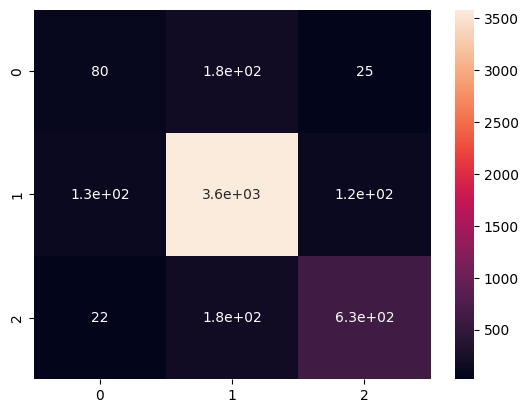

In [ ]:
y_true = y_test
y_pred = passive_aggressive_output
cm_for_passive_aggressive_output = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_passive_aggressive_output, annot=True)

In [ ]:
print(classification_report(y_true,passive_aggressive_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.34      0.28      0.31       290
           1       0.91      0.93      0.92      3832
           2       0.81      0.75      0.78       835

    accuracy                           0.87      4957
   macro avg       0.69      0.65      0.67      4957
weighted avg       0.86      0.87      0.86      4957



In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

0.8607917950499755
0.8652410732297761
0.857502028288341


***Naive Bayes***

In [ ]:
parameters_Naive_Bayes ={'alpha':[1.0,10.0,100.0,1000],'fit_prior':(True,False),'class_prior':[[0.2, 0.5,0.9]]}
Naive_Bayes = MultinomialNB()
clf = GridSearchCV(estimator=Naive_Bayes, param_grid=parameters_Naive_Bayes )
# Fit the model using dense data
clf.fit( x_train_vectorizer, y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1.0, 10.0, 100.0, 1000],
                         'class_prior': [[0.2, 0.5, 0.9]],
                         'fit_prior': (True, False)})

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([0.00707088, 0.00645285, 0.00665574, 0.00631499, 0.00631838,
       0.00625215, 0.0070169 , 0.00680928]), 'std_fit_time': array([1.29628457e-03, 1.20646624e-04, 4.01765440e-04, 8.71122893e-05,
       1.01311839e-04, 6.34868162e-05, 1.28585976e-03, 6.58446498e-04]), 'mean_score_time': array([0.00138569, 0.00141168, 0.00136385, 0.00134783, 0.00130625,
       0.00131545, 0.00134468, 0.00139623]), 'std_score_time': array([7.94498569e-05, 4.90892217e-05, 2.97725911e-05, 2.67026254e-05,
       9.20851446e-06, 3.66828814e-05, 4.22023783e-05, 7.84701285e-05]), 'param_alpha': masked_array(data=[1.0, 1.0, 10.0, 10.0, 100.0, 100.0, 1000, 1000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_class_prior': masked_array(data=[list([0.2, 0.5, 0.9]), list([0.2, 0.5, 0.9]),
                   list([0.2, 0.5, 0.9]), list([0.2, 0.5, 0.9]),
                   list([0.2, 0.5, 0.9]), list([0.2, 0.5,

In [ ]:
df_navie_bayes = pd.DataFrame(clf.cv_results_)

In [ ]:
df_navie_bayes

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_class_prior,param_fit_prior,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007071,0.001296,0.001386,0.000079,1.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.876954,0.883733,0.868348,0.880958,0.881715,0.878342,0.005461,1
1,0.006453,0.000121,0.001412,0.000049,1.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.876954,0.883733,0.868348,0.880958,0.881715,0.878342,0.005461,1
2,0.006656,0.000402,0.001364,0.000030,10.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.841906,0.843380,0.840858,0.847667,0.845649,0.843892,0.002480,3
3,0.006315,0.000087,0.001348,0.000027,10.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.841906,0.843380,0.840858,0.847667,0.845649,0.843892,0.002480,3
4,0.006318,0.000101,0.001306,0.000009,100.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.812405,0.814376,0.814628,0.819420,0.818411,0.815848,0.002640,5
5,0.006252,0.000063,0.001315,0.000037,100.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.812405,0.814376,0.814628,0.819420,0.818411,0.815848,0.002640,5
6,0.007017,0.001286,0.001345,0.000042,1000,"[0.2, 0.5, 0.9]",True,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.808371,0.805801,0.807062,0.814880,0.817654,0.810754,0.004658,7
7,0.006809,0.000658,0.001396,0.000078,1000,"[0.2, 0.5, 0.9]",False,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.808371,0.805801,0.807062,0.814880,0.817654,0.810754,0.004658,7


In [ ]:
df_navie_bayes[['param_alpha'	,'param_class_prior','param_fit_prior'	, 'params', 'mean_test_score', 'rank_test_score']]

,param_alpha,param_class_prior,param_fit_prior,params,mean_test_score,rank_test_score
0,1.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.878342,1
1,1.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.878342,1
2,10.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.843892,3
3,10.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.843892,3
4,100.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.815848,5
5,100.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.815848,5
6,1000,"[0.2, 0.5, 0.9]",True,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.810754,7
7,1000,"[0.2, 0.5, 0.9]",False,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.810754,7


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9], 'fit_prior': True}
MultinomialNB(class_prior=[0.2, 0.5, 0.9])


In [ ]:
naive_bayes_output = clf.predict(x_test_vectorizer)

<Axes: >

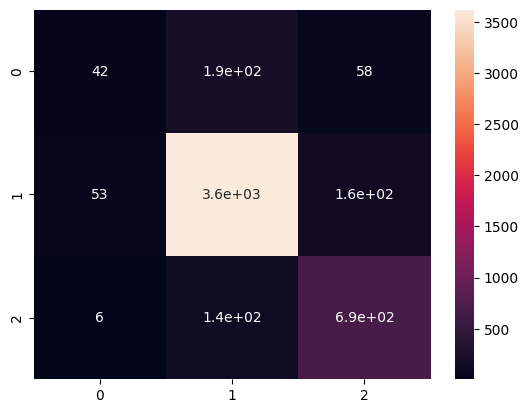

In [ ]:
y_true = y_test
y_pred = naive_bayes_output
cm_for_naive_bayes_output = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_naive_bayes_output, annot=True)

In [ ]:
print(classification_report(y_true,naive_bayes_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.42      0.14      0.21       290
           1       0.92      0.94      0.93      3832
           2       0.76      0.83      0.79       835

    accuracy                           0.88      4957
   macro avg       0.70      0.64      0.65      4957
weighted avg       0.86      0.88      0.87      4957



In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

0.8653642811177037
0.8779503732096026
0.8612529014042244


**KNN**

In [ ]:
parameters_KNN = {'n_neighbors' : [2,3,5], 'algorithm' : ('ball_tree', 'kd_tree'), 'leaf_size' : [10,30 ,50], 'p':[1,2,3] ,'n_jobs' : [10,100,1000] }
KNN = KNeighborsClassifier()
neigh =GridSearchCV(KNN , parameters_KNN )
neigh.fit(x_train_vectorizer,y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree'),
                         'leaf_size': [10, 30, 50], 'n_jobs': [10, 100, 1000],
                         'n_neighbors': [2, 3, 5], 'p': [1, 2, 3]})

In [ ]:
print(neigh.cv_results_)

{'mean_fit_time': array([0.00843573, 0.01268125, 0.00906053, 0.00915966, 0.00420065,
       0.00298209, 0.00491929, 0.00387163, 0.00279689, 0.00434699,
       0.00399461, 0.0043766 , 0.00390573, 0.00397577, 0.00286517,
       0.0035984 , 0.00519691, 0.00284271, 0.00411482, 0.00435057,
       0.00300665, 0.00377355, 0.0042129 , 0.00327425, 0.00404992,
       0.00410895, 0.0041822 , 0.00425019, 0.00426717, 0.00295029,
       0.00360193, 0.00588145, 0.00468445, 0.00452838, 0.0038609 ,
       0.0028614 , 0.00474896, 0.00397067, 0.0040256 , 0.00470757,
       0.00403962, 0.00285339, 0.00423713, 0.00403333, 0.00290351,
       0.00395403, 0.00488257, 0.00331626, 0.00359759, 0.00460358,
       0.00293112, 0.00422859, 0.00567546, 0.00283585, 0.0045372 ,
       0.00464482, 0.00292649, 0.00411429, 0.0046639 , 0.00331621,
       0.00433192, 0.00474377, 0.00293689, 0.00370646, 0.00417695,
       0.00295544, 0.00371208, 0.00478206, 0.00294328, 0.00423412,
       0.00516186, 0.00300202, 0.00377727, 0

In [ ]:
df_KNN = pd.DataFrame(neigh.cv_results_)

In [ ]:
df_KNN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_jobs,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008436,0.001943,8.593317,0.668951,ball_tree,10,10,2,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.797781,0.784363,0.779067,0.776797,0.779067,0.783415,0.007601,73
1,0.012681,0.008956,4.766875,0.905512,ball_tree,10,10,2,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.794251,0.782346,0.779319,0.775032,0.779571,0.782104,0.006508,91
2,0.009061,0.004061,0.000000,0.000000,ball_tree,10,10,2,3,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
3,0.009160,0.008096,8.871539,1.139763,ball_tree,10,10,3,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.837115,0.834300,0.833039,0.817654,0.821942,0.828810,0.007598,1
4,0.004201,0.000596,4.081020,0.151177,ball_tree,10,10,3,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.835350,0.832282,0.831778,0.816141,0.821942,0.827499,0.007249,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.004394,0.000789,6.259564,0.614324,kd_tree,50,1000,3,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.835350,0.832282,0.831778,0.816141,0.821942,0.827499,0.007249,19
158,0.004421,0.000188,0.000000,0.000000,kd_tree,50,1000,3,3,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
159,0.004003,0.000409,10.151550,0.803000,kd_tree,50,1000,5,1,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.824760,0.823455,0.828752,0.825473,0.829760,0.826440,0.002410,37
160,0.005090,0.001211,6.309997,0.364981,kd_tree,50,1000,5,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.822743,0.821438,0.833796,0.819168,0.820429,0.823515,0.005273,55


In [ ]:
df_KNN[['param_algorithm'	,'param_leaf_size',	'param_n_jobs'	,'param_n_neighbors'	,'param_p','params', 'mean_test_score', 'rank_test_score']]

,param_algorithm,param_leaf_size,param_n_jobs,param_n_neighbors,param_p,params,mean_test_score,rank_test_score
0,ball_tree,10,10,2,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.783415,73
1,ball_tree,10,10,2,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.782104,91
2,ball_tree,10,10,2,3,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",NaN,109
3,ball_tree,10,10,3,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.828810,1
4,ball_tree,10,10,3,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.827499,19
...,...,...,...,...,...,...,...,...
157,kd_tree,50,1000,3,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.827499,19
158,kd_tree,50,1000,3,3,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",NaN,109
159,kd_tree,50,1000,5,1,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.826440,37
160,kd_tree,50,1000,5,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.823515,55


In [ ]:
print(neigh.best_params_)
print(neigh.best_estimator_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_jobs': 10, 'n_neighbors': 3, 'p': 1}
KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_jobs=10,
                     n_neighbors=3, p=1)


In [ ]:
KNN_output = neigh.predict(x_test_vectorizer)

<Axes: >

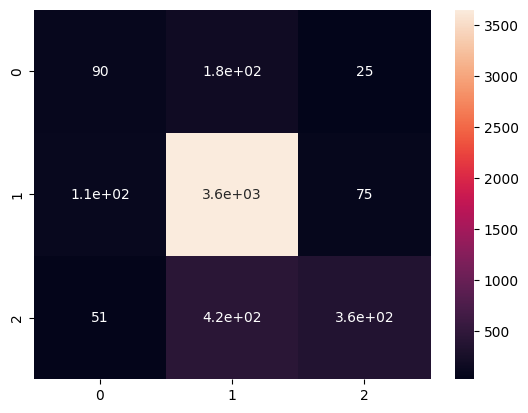

In [ ]:
y_true = y_test
y_pred = KNN_output
cm_for_KNN_output = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_KNN_output, annot=True)

In [ ]:
print(classification_report(y_true,KNN_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.36      0.31      0.33       290
           1       0.86      0.95      0.90      3832
           2       0.78      0.43      0.56       835

    accuracy                           0.83      4957
   macro avg       0.67      0.56      0.60      4957
weighted avg       0.82      0.83      0.81      4957



In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

0.8112818726057676
0.8267097034496671
0.8169074371078463


***Random Forest***

In [ ]:
parameters_Random_forest ={'max_depth': [3,2,10,100,1000], 'random_state' : [0,42,123] ,'n_estimators' :[10,100,1000], 'criterion' : ('gini', 'entropy', 'log_loss') ,'min_samples_split': [2,20,30,40] , 'max_features': ('sqrt','log2',None),'bootstrap':(True,False),'n_jobs':[10,100,1000]}
Random_Forest = RandomForestClassifier()
clf =GridSearchCV(Random_Forest,parameters_Random_forest )
clf.fit(x_train_vectorizer,y_train)

In [ ]:
print(clf.cv_results_)

In [ ]:
df_Random_Forest = pd.DataFrame(clf.cv_results_)

In [ ]:
df_Random_Forest

In [ ]:
df_Random_Forest[['params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
Random_forest_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred =Random_forest_output
cm_for_Random_forest = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_Random_forest, annot=True)

In [ ]:
print(classification_report(y_true,Random_forest_output,labels=[0,1,2]))